In [8]:
# Load libraries
import json
import pandas
from IPython.display import display, HTML

# load data
raw = pandas.read_csv("raw.csv", encoding="big5", index_col=[0,1])
raw = raw.reset_index("區域")
X = raw.reset_index().iloc[:,7:10]
'''X = pandas.concat([X.iloc[:,[0,4]].rename(columns={'7-11 (%)':'persentage'}),
        X.iloc[:,[1,4]].rename(columns={'OK (%)':'persentage'}),
        X.iloc[:,[2,4]].rename(columns={'全家 (%)':'persentage'}),
        X.iloc[:,[3,4]].rename(columns={'萊爾富 (%)':'persentage'})]).reset_index().iloc[:,1:3]'''
display(X)
'''y = pandas.concat([raw.iloc[:,0], raw.iloc[:,0], raw.iloc[:,0], raw.iloc[:,0]]).reset_index().iloc[:,1:2]
display(y)
region = {"北":0, "中":1, "南":2, "東":3, "外":4}
y = y["區域"].map(region)
display(y)'''
region = {"北":0, "中":1, "南":2, "東":3, "外":4}
y = raw["區域"].map(region)
display(y)

,7-11 (%),OK (%),全家 (%)
0,0.387255,0.308824,0.264706
1,0.532609,0.108696,0.288043
2,0.448244,0.067006,0.347043
3,0.477941,0.036765,0.275735
4,0.490854,0.115854,0.219512
5,0.492754,0.097424,0.217391
6,0.519157,0.050447,0.322478
7,0.566474,0.104046,0.265896
8,0.572650,0.111111,0.205128
9,0.534738,0.076503,0.312256


行政區
基隆市    0
宜蘭縣    0
新北市    0
新竹市    0
新竹縣    0
桃園市    0
臺北市    0
南投縣    1
彰化縣    1
臺中市    1
苗栗縣    1
雲林縣    1
嘉義市    2
嘉義縣    2
屏東縣    2
臺南市    2
高雄市    2
臺東縣    3
花蓮縣    3
澎湖縣    4
連江縣    4
金門縣    4
Name: 區域, dtype: int64

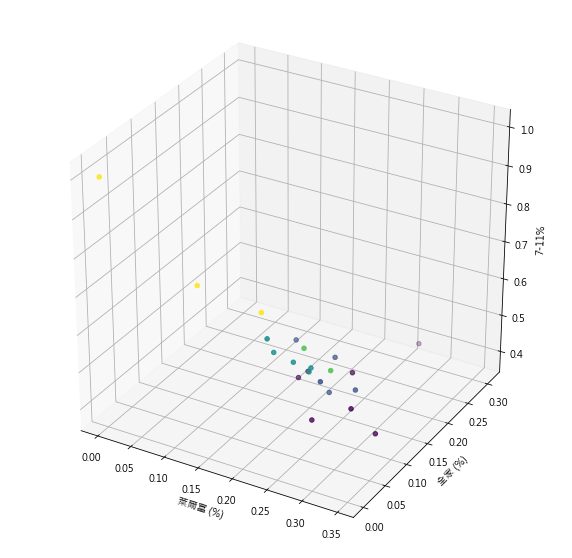

[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 2 1]


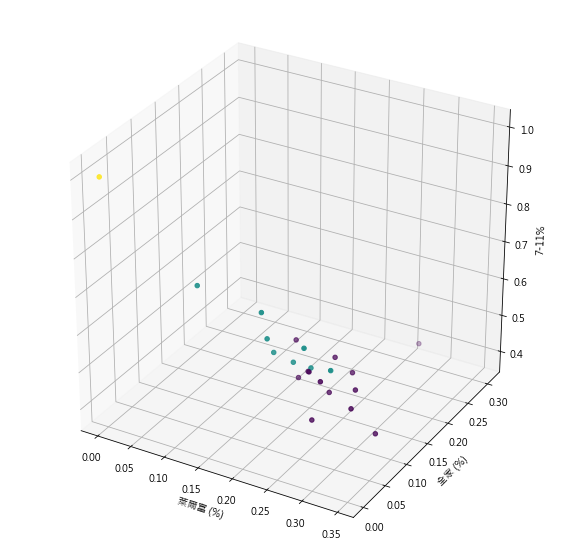

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.iloc[:,2], X.iloc[:,1], X.iloc[:,0], c=y, marker='o')

ax.set_zlabel('7-11%')
ax.set_ylabel('全家 (%)')
ax.set_xlabel('萊爾富 (%)')

plt.show()

'''#接下來匯入KMeans函式庫
from sklearn.cluster import KMeans

#請KMeans分成三類
clf = KMeans(n_clusters=3)

#開始訓練！
clf.fit(X)

#這樣就可以取得預測結果了！
print(clf.labels_)

#最後畫出來看看
#真的分成三類！太神奇了………無意義的資料也能分～
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.iloc[:,2], X.iloc[:,1], X.iloc[:,0], c=clf.labels_)
ax.set_zlabel('7-11%')
ax.set_ylabel('全家 (%)')
ax.set_xlabel('萊爾富 (%)')
plt.show()'''

# KNN
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
print(neigh.predict([[1.1]]))
print(neigh.predict_proba([[0.9]]))

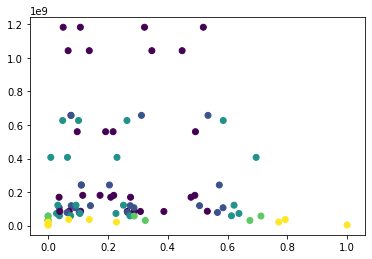

In [36]:
import matplotlib.pyplot as plt

plt.scatter(X.iloc[:,0],X.iloc[:,1], c=y)
plt.show()

persentage    3.872549e-01
綜合所得總額        8.412749e+07
Name: 0, dtype: float64


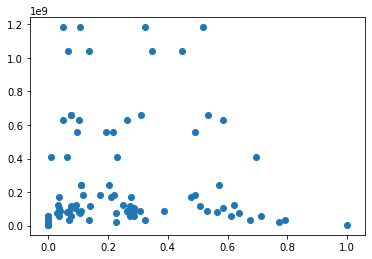

[0 0 1 4 4 2 1 0 4 2 0 0 0 0 0 3 2 0 0 0 0 0 0 0 1 4 4 2 1 0 4 2 0 0 0 0 0
 3 2 0 0 0 0 0 0 0 1 4 4 2 1 0 4 2 0 0 0 0 0 3 2 0 0 0 0 0 0 0 1 4 4 2 1 0
 4 2 0 0 0 0 0 3 2 0 0 0 0 0]


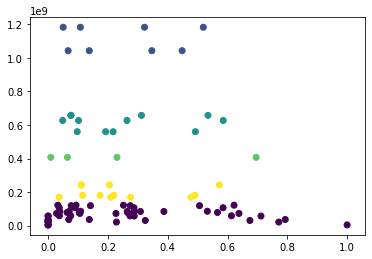

In [29]:
import matplotlib.pyplot as plt

print(X.iloc[0])

plt.scatter(X.iloc[:,0],X.iloc[:,1])
plt.show()

#接下來匯入KMeans函式庫
from sklearn.cluster import KMeans

#請KMeans分成三類
clf = KMeans(n_clusters=5)

#開始訓練！
clf.fit(X)

#這樣就可以取得預測結果了！
print(clf.labels_)

#最後畫出來看看
#真的分成三類！太神奇了………無意義的資料也能分～
plt.scatter(X.iloc[:,0],X.iloc[:,1], c=clf.labels_)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print(kmeans.labels_)
print(kmeans.get_params())
print(kmeans.cluster_centers_)